In [34]:
import numpy as np
import pandas as pd
import csv

import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# read csv into a dataframe
df_idf = pd.read_csv("green_not_green_2000.csv")#DataSources/small_name_review_green.csv")
 
# print schema
print(df_idf.dtypes)
print(df_idf.shape)

Unnamed: 0        int64
name             object
review_text      object
green_boolean    object
dtype: object
(2000, 4)


In [35]:
df_idf = df_idf.drop('Unnamed: 0', axis=1)
df_idf = df_idf.rename(columns={'review_text': 'text'})

In [36]:
#### first entry is a tattoo parlor
df_idf.head()

,name,text,green_boolean
0,GREEN NEW AMERICAN VEGETARIAN,absolutely love this place i ve been here man...,green
1,BELLEVILLE ALE HOUSE,best bar is belleville inside and out this is...,green
2,CHIN'S PAGODA CHINESE & AMERICAN RESTAURANT,if you are looking for a nice high class rest...,green
3,ANNIE'S KITCHEN,annie s is not closed as i was there today fo...,green
4,BEACH BAR & GRILL,we were pool beach side and service was easy ...,green


In [37]:
green = df_idf.copy()
nongreen = df_idf.copy()

In [38]:
green = green[green['green_boolean'] == "green"]
green.reset_index(inplace=True)
nongreen = nongreen[nongreen['green_boolean'] == "not_green"]
nongreen.reset_index(inplace=True)

In [39]:
#green.info()

In [40]:
#nongreen.info()

In [41]:
green = green.drop(['green_boolean','index'], axis=1)
nongreen = nongreen.drop(['green_boolean','index'], axis=1)

In [42]:
green.head()

,name,text
0,GREEN NEW AMERICAN VEGETARIAN,absolutely love this place i ve been here man...
1,BELLEVILLE ALE HOUSE,best bar is belleville inside and out this is...
2,CHIN'S PAGODA CHINESE & AMERICAN RESTAURANT,if you are looking for a nice high class rest...
3,ANNIE'S KITCHEN,annie s is not closed as i was there today fo...
4,BEACH BAR & GRILL,we were pool beach side and service was easy ...


In [43]:
nongreen.head()

,name,text
0,NOM NOM,i have been several times to nom nom and rece...
1,MAI JAPANESE RESTAURANT,yoshi at mai pronounced mi is an artist sushi...
2,CHIN CHINE,we were on a thu nite poor service from hoste...
3,PHO KIM,seriously great pho there is a lot of meat in...
4,THE GRAND HOTEL AT ASHRAM GALACTICA,wow the ashram galactica at the grand hotel i...


In [44]:
from nltk.stem import WordNetLemmatizer 
import re
def pre_process(text):
    # lowercase
    text=text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

In [45]:
green['text'] = green['text'].apply(lambda x:pre_process(x))
nongreen['text'] = nongreen['text'].apply(lambda x:pre_process(x))

In [46]:
green.head()

,name,text
0,GREEN NEW AMERICAN VEGETARIAN,absolutely love this place i ve been here man...
1,BELLEVILLE ALE HOUSE,best bar is belleville inside and out this is...
2,CHIN'S PAGODA CHINESE & AMERICAN RESTAURANT,if you are looking for a nice high class rest...
3,ANNIE'S KITCHEN,annie s is not closed as i was there today fo...
4,BEACH BAR & GRILL,we were pool beach side and service was easy ...


In [47]:
#green['text'][2]

In [76]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", 
              "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
              "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", 
              "their", "theirs", "themselves", "what", "which", "who", "whom", "this", 
              "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", 
              "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", 
              "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", 
              "of", "at", "by", "for", "with", "about", "against", "between", "into", 
              "through", "during", "before", "after", "above", "below", "to", "from", 
              "up", "down", "in", "out", "on", "off", "over", "under", "again", "further",
              "then", "once", "here", "there", "when", "where", "why", "how", "all", 
              "any", "both", "each", "few", "more", "most", "other", "some", "such", 
              "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", 
              "s", "t", "can", "will", "just", "don", "should", "now", "also",
              'us', 've','nthe','thru','ni','didn','even','ever','every','would','got','re',
              'made', 'make', 'many','ll','went']

def remove_stopwords(mytext):
    #stop_words = set(stopwords.words('english')) 
        
    word_tokens = word_tokenize(mytext) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    return filtered_sentence

In [49]:
import nltk
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text))

In [50]:
#clean will have no stopwords, mydfidf will
resultgreen = green.copy()
resultnongreen = nongreen.copy()

In [51]:
resultgreen['text'] = resultgreen['text'].apply(lambda x:remove_stopwords(x))
resultnongreen['text'] = resultnongreen['text'].apply(lambda x:remove_stopwords(x))

In [52]:
resultgreen['text'] = resultgreen['text'].str.join(' ')
resultnongreen['text'] = resultnongreen['text'].str.join(' ')

In [53]:
resultgreen['text_lemmatized'] = resultgreen.text.apply(lemmatize_text)
resultnongreen['text_lemmatized'] = resultnongreen.text.apply(lemmatize_text)

In [54]:
#resultgreen.head()

In [55]:
#resultnongreen.head()

In [56]:
#resultgreen['text_lemmatized'][2]

In [57]:
#resultgreen.text_lemmatized = ' '.join(resultgreen.text_lemmatized)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
greenvectorizer = TfidfVectorizer(max_features=100, smooth_idf=True, )#tokenizer=tokens ,use_idf=True, smooth_idf=True, sublinear_tf=False)
nongreenvectorizer = TfidfVectorizer(max_features=100, smooth_idf=True, )#tokenizer=tokens ,use_idf=True, smooth_idf=True, sublinear_tf=False)



In [59]:
greenmatrix = greenvectorizer.fit_transform(resultgreen['text'])
nongreenmatrix = nongreenvectorizer.fit_transform(resultnongreen['text'])

In [60]:
print(greenvectorizer.get_feature_names())

['always', 'amazing', 'area', 'around', 'back', 'bad', 'bar', 'beer', 'best', 'better', 'big', 'bit', 'burger', 'came', 'cheese', 'chicken', 'coffee', 'come', 'could', 'day', 'definitely', 'delicious', 'drinks', 'eat', 'everything', 'find', 'first', 'food', 'fresh', 'friendly', 'fries', 'get', 'give', 'go', 'going', 'good', 'great', 'green', 'home', 'hot', 'know', 'like', 'little', 'll', 'lot', 'love', 'lunch', 'made', 'make', 'many', 'meal', 'meat', 'menu', 'much', 'never', 'new', 'next', 'nice', 'night', 'one', 'order', 'ordered', 'people', 'pizza', 'place', 'pretty', 'price', 'prices', 'quality', 'really', 'recommend', 'restaurant', 'right', 'salad', 'sandwich', 'sauce', 'say', 'see', 'service', 'side', 'small', 'something', 'staff', 'still', 'super', 'sure', 'take', 'taste', 'tasty', 'think', 'though', 'time', 'tried', 'try', 'two', 'vegan', 'want', 'way', 'well', 'went']


In [61]:
print(nongreenvectorizer.get_feature_names())

['always', 'amazing', 'area', 'around', 'asked', 'back', 'bad', 'bar', 'best', 'better', 'bit', 'came', 'cheese', 'chicken', 'come', 'could', 'day', 'definitely', 'delicious', 'dinner', 'drinks', 'eat', 'everything', 'experience', 'first', 'food', 'fresh', 'fried', 'friendly', 'fries', 'get', 'give', 'go', 'going', 'good', 'great', 'hot', 'know', 'like', 'little', 'll', 'lot', 'love', 'lunch', 'made', 'make', 'many', 'meal', 'meat', 'menu', 'minutes', 'much', 'never', 'new', 'nice', 'night', 'one', 'order', 'ordered', 'people', 'pizza', 'place', 'pretty', 'price', 'prices', 'quality', 'really', 'recommend', 'restaurant', 'rice', 'right', 'said', 'salad', 'sauce', 'say', 'service', 'side', 'since', 'small', 'soup', 'staff', 'still', 'sure', 'sushi', 'table', 'take', 'taste', 'think', 'though', 'time', 'times', 'tried', 'try', 'two', 'wait', 'want', 'wasn', 'way', 'well', 'went']


In [62]:
print(greenmatrix.shape)

(1000, 100)


In [63]:
print(nongreenmatrix.shape)

(1000, 100)


# Wordcloud

In [64]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [65]:
#?WordCloud

In [66]:
mytext = resultgreen.text_lemmatized[2] #= resultnongreen.text_lemmatized.replace('[','').replace(']','')
mytext = ' '.join(mytext)

In [69]:
# Start with one review:
#greentext = resultgreen.text_lemmatized[2]
# Create and generate a word cloud image:
#wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(greentext)
# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [70]:
# Start with one review:
#nongreentext = resultnongreen.text_lemmatized[2]
# Create and generate a word cloud image:
#wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(greentext)
# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear') 
#plt.axis("off")
#plt.show()

In [72]:
greentext = " ".join(review for review in resultgreen.text_lemmatized)
print ("There are {} words in the combination of all review.".format(len(greentext)))

There are 6258234 words in the combination of all review.


In [73]:
nongreentext = " ".join(review for review in resultnongreen.text_lemmatized)
print ("There are {} words in the combination of all review.".format(len(nongreentext)))

There are 10145384 words in the combination of all review.


In [97]:
#update stopword list:
#stopwords = set(STOPWORDS)
stop_words.extend(['really','get','order','great','go','come',
                   'like','one','say','take','food','drink',
                   'good','place','eat','think','try','restaurant',
                    'back','time','look','love','well','want',
                    'nice','know'])

In [198]:
stop_words.extend(['taste','delicious','menu','give','find','best',
                  'definitely','sure','could','bar','little','give',
                  'alway','better','thing','friend','ask','way',
                  'service','much','around','always','still','use',
                  'never','tell','need','though','first','price',
                  'serve','people','amaze','see','area','something',
                  'visit','since','pretty','dish','enjoy',
                  'meal','bite','day','two','offer','work',
                  'small','lot','customer','leave','seem','server',
                  'wait','side','feel','staff','everything','fill',
                  'stop','bad','next','disappointment','table','owner',
                  'home', 'call', 'new', 'kind', 'right','wasn', 'probably', 
                   'item', 'location', 'another','seat','lunch','things',
                   'enough','guy','inside','items','bring','disappoint',
                   'walk','pick','check','sit','cook','close','ok','special',
                   'decide','top','minute','review','qualify','expect','keep',
                   'experience','waitress','dinner','friendly','excellent','awesome',
                  'however','recommend','super','option','stuff','long','star',
                  'open','full','breakfast','lunch','shop','store','end','spot',
                  'quite','nwe','put','buy','favorite','choice','bartender',
                  'win','choose','actually','night','family','anything','start',
                  'maybe','point','nothing','perfect','state','pay','win',
                  'usually','last','hour','let','house','year','cool','wish',
                  'must','return','busy','decent','clean','especially','part','half',
                  'add','far','hard','worth','highly','options','run','especially',
                  'although','customers','almost', 'everyone','minutes','hard','big',
                  'different','large','instead','husband','absolutely','less','wife',
                  'atmosphere','friends','drive','isn','business','town','help','old',
                  'quick','portion','overall','include','kitchen','couple','mean',
                  'away','doesn','kid','without','today','cold','fast','place','else',
                  'huge','fun','hand','arrive','show','deal','type','de','hear','nthis',
                  'years','change','nthey','name','okay','hot','reasonable','turn','nit',
                  'least','decor','size','may','plate','talk','surprise','several',
                  'room','finish','party','either','din','week','stay','amount','line',
                  'din','finally','might','plu','yet','person','second','truck',
                  'someone','delivery','fan','dry','guess','employee','couldn',
                  'door','charge','piece','restaurants','often','girl','chinese',
                  'group','three','please','able','wrong'])

In [222]:
stop_words.extend(['cheese','roll','fry','pizza','burger','sauce','coffee','sandwich','sushi','flavor','chicken'])


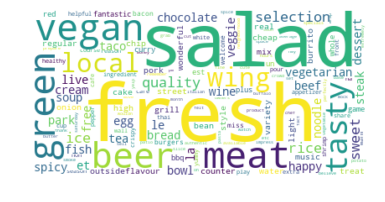

In [224]:
# Create and generate a word cloud image:
gwordcloud = WordCloud(stopwords=stop_words, max_words=150, background_color="white", collocations = False).generate(greentext)

# Display the generated image:
plt.imshow(gwordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

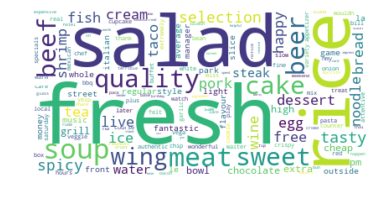

In [225]:
# Create and generate a word cloud image:
ngwordcloud = WordCloud(stopwords=stop_words,  max_words=150, background_color="white", collocations = False).generate(nongreentext)

# Display the generated image:
plt.imshow(ngwordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [226]:
# Save the image in the img folder:
gwordcloud.to_file("newest_green_review.png")
# Save the image in the img folder:
ngwordcloud.to_file("newest_nongreen_review.png")

In [192]:
greenwords = " ".join(review for review in resultgreen.text_lemmatized)
print ("There are {} words in the combination of all review.".format(len(greenwords)))

There are 6258234 words in the combination of all review.


In [193]:
#wordcloud based on greenword features
greens = ['healthy','vegetarian','life','future','locals','greens',
          'environment','eggplant','living','outdoor','community',
          'locally','organic','vegan','natural','health','support',
          'energy','businesses','farm','neighbourhood','tap','regulars',
          'neighborhood','cozy','available','craft','farmer','recently',
          'products','dive','farmers','world','samples','par','beautiful',
          'buy','non','coffee','aux','event','gourmet','market']

total_green_words = ''

greenwords = greenwords.split(' ')

for word in greenwords:
    if word in greens:
        total_green_words += word + ' '
        #print("The word is in the list!")
    else:
        pass
        #print("The word is not in the list!")



In [209]:
#total_green_words

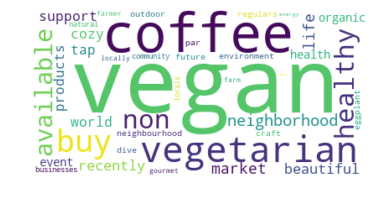

In [196]:
# Create and generate a word cloud image:
topgreenwordcloud = WordCloud(background_color="white",collocations = False).generate(total_green_words)

# Display the generated image:
plt.imshow(topgreenwordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [197]:
topgreenwordcloud.to_file("top_green_wordcloud.png")